In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import quandl
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

* This notebook contain the complete rutine to download the Dow Jones stock market time series. In relation with the code:
    
    1. This notebook is inspired in the folloing tutorials:
    
        * Part I: https://medium.com/python-data/effient-frontier-in-python-34b0c3043314
 
        * Part II: https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94 

    2. The time series have been downloades from the Python engine of  https://www.quandl.com
_________________________

# 1. Download the data from Quandl app

In [5]:
quandl.ApiConfig.api_key = 'hgF4uSPa9s6FRRzqxvX_'
selected                 = ["AXP","AAPL","BA","CAT","CSCO","CVX","DD","XOM","GE","GS",
                            "HD","IBM","INTC","JNJ","KO","JPM","MCD","MMM","MRK","MSFT",
                            "NKE","PFE","PG","TRV","UNH","UTX","VZ","V","WMT","DIS"]
df1                      = quandl.get_table('WIKI/PRICES', 
                                             ticker = selected,
                                             qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                                             date = { 'gte': '2010-1-1', 'lte': '2019-12-31' }, 
                                             paginate = True)
print(df1.shape)
df1.head()

(61852, 3)


,date,ticker,adj_close
None,,,
0,2018-03-27,XOM,73.70
1,2018-03-26,XOM,74.00
2,2018-03-23,XOM,72.89
3,2018-03-22,XOM,73.50
4,2018-03-21,XOM,75.04


In [6]:
print("Dow Jones Index firms: ",len(selected))
print("Founded firms: ",len(df1["ticker"].unique()))

Dow Jones Index firms:  30
Founded firms:  30


# 2. Save the time series in .pkl format

In [7]:
df1 = df1.pivot(columns = 'ticker',index = "date",values = "adj_close")
df1 = pd.DataFrame(df1.to_records()).rename(columns={'date':'time'})
df1.head()

,time,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
0,2010-01-04,27.503268,36.309612,45.877362,46.795025,20.403200,59.405950,25.821063,28.960651,12.005225,...,14.751122,14.063359,47.474231,41.576616,28.063718,59.603563,20.802686,21.356048,44.428303,54.558817
1,2010-01-05,27.550818,36.229752,47.379931,47.354487,20.312299,59.826736,25.572349,28.888407,12.067388,...,14.809811,13.862772,47.489766,40.591665,28.019215,58.713213,20.564307,21.086531,43.985905,54.771845
2,2010-01-06,27.112585,36.815391,48.817171,47.498349,20.180079,59.834250,25.655254,28.734890,12.005225,...,14.719521,13.818197,47.264512,40.015719,28.295135,58.405335,20.288165,20.788137,43.887594,55.245241
3,2010-01-07,27.062465,37.409903,50.793376,47.690165,20.270980,59.608829,25.919041,28.743920,12.626855,...,14.863985,13.766193,47.008188,40.591665,29.381013,58.654966,20.476980,20.664398,43.912172,55.071662
4,2010-01-08,27.242385,37.383169,50.303408,48.225650,20.378409,59.714026,25.579886,28.789072,12.898818,...,14.834641,13.877630,46.946049,40.533236,29.105093,58.771460,20.533625,20.677423,43.690972,54.850745


In [8]:
df1.tail()

,time,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
2066,2018-03-21,171.270,94.74,337.10,155.80,44.31,117.04,NaN,101.82,13.88,...,66.35,36.27,77.04,141.10,222.82,127.00,123.22,47.28,88.18,75.04
2067,2018-03-22,168.845,91.41,319.61,146.90,43.07,113.70,NaN,100.60,13.35,...,64.42,35.60,76.41,138.15,215.21,124.07,119.99,46.88,87.14,73.50
2068,2018-03-23,164.940,90.45,321.00,144.29,42.42,112.98,NaN,98.54,13.07,...,64.63,34.49,75.91,134.90,212.55,122.31,117.00,46.29,85.42,72.89
2069,2018-03-26,172.770,92.62,328.97,149.19,44.06,115.35,NaN,100.65,12.89,...,65.90,35.04,76.41,138.22,219.07,126.64,120.64,47.07,87.50,74.00
2070,2018-03-27,168.340,91.42,321.12,146.99,42.68,114.66,NaN,99.36,13.44,...,66.17,35.01,77.79,136.75,217.96,125.28,117.40,47.31,86.05,73.70


In [9]:
df1.shape

(2071, 31)

In [10]:
df2 = df1.sort_values("time")
df2 = df2.set_index("time")
df2.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
time,,,,,,,,,,,,,,,,,,,,,
2018-03-21,171.270,94.74,337.10,155.80,44.31,117.04,NaN,101.82,13.88,261.85,...,66.35,36.27,77.04,141.10,222.82,127.00,123.22,47.28,88.18,75.04
2018-03-22,168.845,91.41,319.61,146.90,43.07,113.70,NaN,100.60,13.35,252.60,...,64.42,35.60,76.41,138.15,215.21,124.07,119.99,46.88,87.14,73.50
2018-03-23,164.940,90.45,321.00,144.29,42.42,112.98,NaN,98.54,13.07,245.26,...,64.63,34.49,75.91,134.90,212.55,122.31,117.00,46.29,85.42,72.89
2018-03-26,172.770,92.62,328.97,149.19,44.06,115.35,NaN,100.65,12.89,254.88,...,65.90,35.04,76.41,138.22,219.07,126.64,120.64,47.07,87.50,74.00
2018-03-27,168.340,91.42,321.12,146.99,42.68,114.66,NaN,99.36,13.44,247.26,...,66.17,35.01,77.79,136.75,217.96,125.28,117.40,47.31,86.05,73.70


In [11]:
df2.to_pickle("../data/df_dow_jones.pkl")

In [12]:
df3 = pd.read_pickle("../data/df_dow_jones.pkl")
df3.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.503268,36.309612,45.877362,46.795025,20.403200,59.405950,25.821063,28.960651,12.005225,156.422204,...,14.751122,14.063359,47.474231,41.576616,28.063718,59.603563,20.802686,21.356048,44.428303,54.558817
2010-01-05,27.550818,36.229752,47.379931,47.354487,20.312299,59.826736,25.572349,28.888407,12.067388,159.187700,...,14.809811,13.862772,47.489766,40.591665,28.019215,58.713213,20.564307,21.086531,43.985905,54.771845
2010-01-06,27.112585,36.815391,48.817171,47.498349,20.180079,59.834250,25.655254,28.734890,12.005225,157.488637,...,14.719521,13.818197,47.264512,40.015719,28.295135,58.405335,20.288165,20.788137,43.887594,55.245241
2010-01-07,27.062465,37.409903,50.793376,47.690165,20.270980,59.608829,25.919041,28.743920,12.626855,160.570447,...,14.863985,13.766193,47.008188,40.591665,29.381013,58.654966,20.476980,20.664398,43.912172,55.071662
2010-01-08,27.242385,37.383169,50.303408,48.225650,20.378409,59.714026,25.579886,28.789072,12.898818,157.533825,...,14.834641,13.877630,46.946049,40.533236,29.105093,58.771460,20.533625,20.677423,43.690972,54.850745


/Users/amit/src/stock_prediction/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/amit/src/stock_prediction/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/amit/src/stock_prediction/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/amit/src/stock_prediction/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 


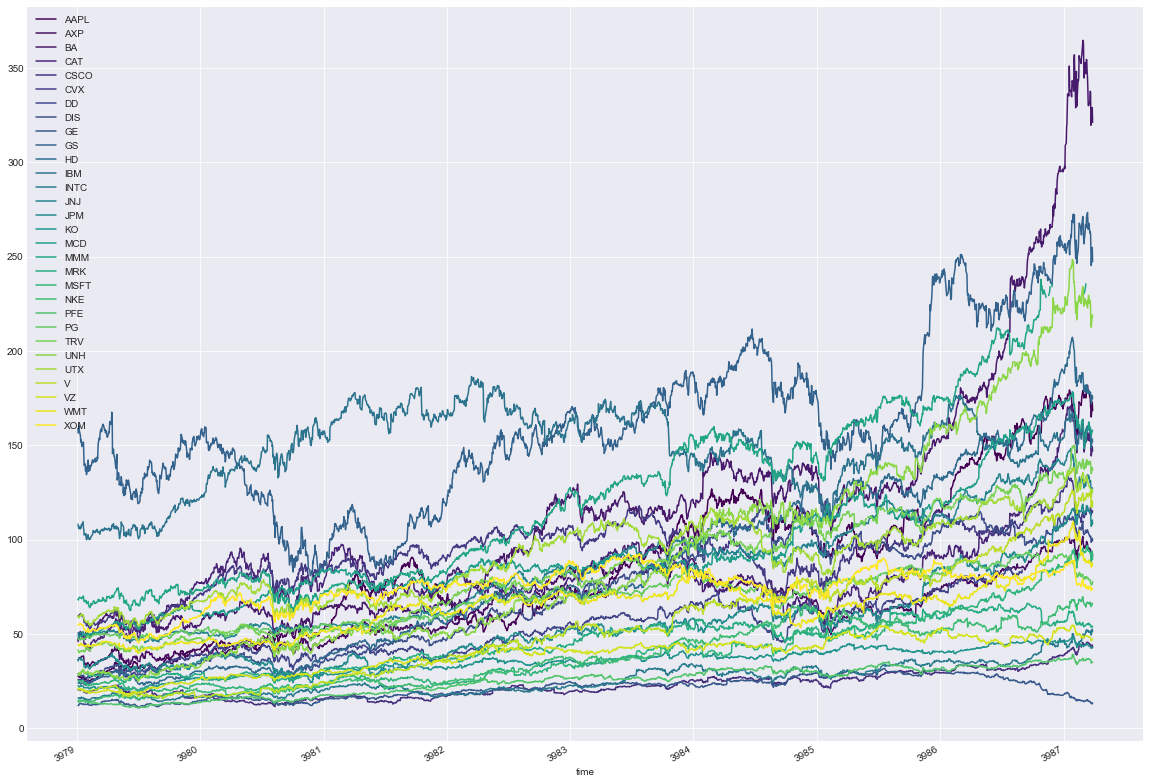

In [13]:
plt.style.use('seaborn-dark')

df3.plot(cmap= "viridis",figsize=(20,15))
plt.grid()
plt.show()